In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [3]:
import numpy as np
from qiskit import *
%matplotlib inline

In [16]:
# Create a Quantum Circuit acting on a quantum register of a one qubit
circ = QuantumCircuit(2)

In [17]:
circ.h(0)
circ.cx(0,1)

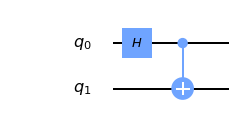

In [18]:
circ.draw()

In [19]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


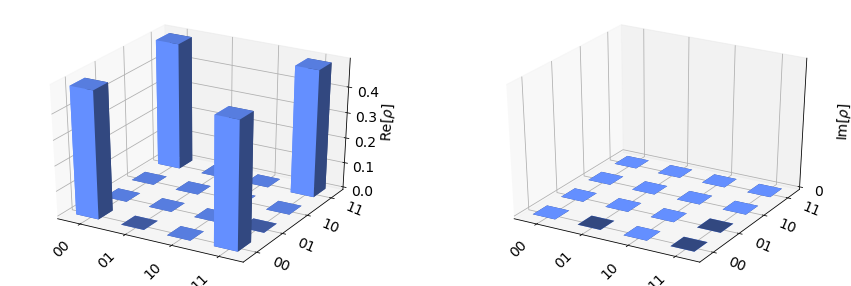

In [20]:
plot_state_city(outputstate)

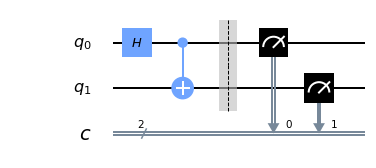

In [22]:
# Create a Quantum Circuit
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2),range(2))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

In [23]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [24]:
counts = result_sim.get_counts(qc)
print(counts)

{'00': 521, '11': 503}


In [25]:
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_burlington')
job_exp = execute(qc, backend=backend)

Credentials are already in use. The existing account in the session will be replaced.


In [26]:
job_monitor(job_exp)

Job Status: job has successfully run


In [27]:
result_exp = job_exp.result()

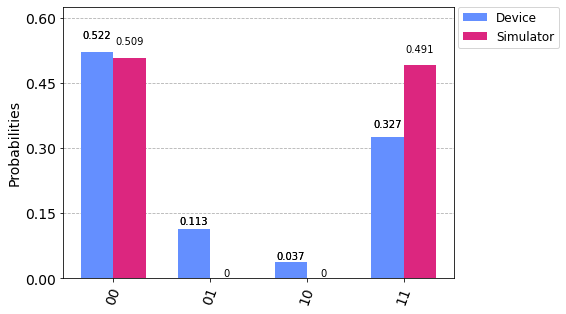

In [28]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

```Przedstawiony przykład jest tym samym którego użyłam do zaprezentowania stanu splątanego. Dla stanu początkowego |00> amplitudy to: A=1/sqrt(2) B=0 C=0 D=1/sqrt(2). Zatem prawdopodobieństwa otrzymania |00> to 1/2 i |11> to 1/2.```
<br>
1. Wynik pokazujacy aplitudy stanu za pomocą statevector simulator <br>
``` [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]```
<br>
2. Wynik pokazujący macierz gęstości tego stanu za pomocą funkcji plot_state_city - wyjaśnić dlaczego taki i jak to się ma do amplitud stanu otrzymanych powyżej. Sprawdzić, że zgadza się ze wzorem na macierz gęstości. <br>

$$\psi = A|00> + B|01> + C|10> + D|11> $$ Po wyliczeniu $$ \rho =|\psi><\psi|$$ otrzymujemy macierz:

$$\rho = \begin{pmatrix} 
{|A|}^2 & A\bar{B} & A\bar{C} & A\bar{D} \\  
B\bar{A} & {|B|}^2 & B\bar{C} & B\bar{D} \\ 
C\bar{A} & C\bar{B} & {|C|}^2 & C\bar{D} \\ 
D\bar{A} & D\bar{B} & D\bar{C} & {|D|}^2 \\\end{pmatrix}$$ 

U nas:
$$ A=\frac{1}{\sqrt{2}}, B = 0, C = 0, D = \frac{1}{\sqrt{2}}$$

$$ \rho = \begin{pmatrix} \frac{1}{2} & 0 & 0 & \frac{1}{2} \\  0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \frac{1}{2} & 0 & 0 & \frac{1}{2} \\\end{pmatrix}$$
```Co zgadza się z otrzymanym plot_state_city(..)```
<br>
3. Wynik pokazujący histogram z symulatora - zwykle nie jest identyczny z tym co moznaby wyliczyć z  aplitud stanu otrzymanych za pomocą statevector simulator. Dlaczego ? <br>
```Na podstawie amplitud - prawdopodobieństwo otrzymania stanu |00> to 1/2 oraz stanu |11> to 1/2. Prawdopodobieństwo otrzymania danego stanu nie oznacza jednak, że wykonując próbę 1024 razy (wartość defaultowa w symulatorze) dokładnie 512 razy otrzymamy |00> i 512 razy |11>. Dlatego wartości na histogramie dla symulatora nie są równe. ```
<br>
4. Wynik pokazujący histogram z prawdziwego komputera kwantowego - zwykle pokazuje stany, które nigdy nie pojawiają się na histogramie z symulatora. Dlaczego? <br>
```Stany histogramu prawdziwego [nieidealnego] komputera kwantowego, które nie pokrywają się ze stanami z symulatora są wynikiem niedoskonałości rzeczywistego komputera kwantowego (wynik m.in. zakłóceń (noise) oraz błędów w trakcie wykonywania).```